# Setup

## Import modules

In [1]:
import sys

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import global variables and plotting functions

In [2]:
sys.path.insert(0, '..')

# global vars
from util_scripts.plotting_fcts_and_vars import years, growth_boroughs, boroughs, west_boroughs, columns, types

# plotting per borrough
from util_scripts.plotting_fcts_and_vars import plot_boroughs, plot_all_boroughs

# plotting stations data
from util_scripts.plotting_fcts_and_vars import plot_stations, plot_stations_percentage_changes

# plotting global vars
from util_scripts.plotting_fcts_and_vars import FIGSIZE, YEAR_XLABEL

sys.path.insert(0, './notebooks')

In [3]:
# don't touch, different column set then for other datasets
types = ["Bus", "Underground", "DLR", "Tram", "Overground", "Emirates Airline", "TfL Rail"]
columns = ["Period and Financial Year", "Reporting Period", "Days in Period", "Period Start", "Period End"] + types 

# Journey_types

In [4]:
journey_types = pd.read_excel("../data/tfl-journeys-type.xlsx", sheet_name="Journeys", skiprows=0, names=columns)

journey_types = journey_types.drop(['Reporting Period','Days in Period','TfL Rail', 'Emirates Airline'], axis=1)
types = types[0:5]
print(types)
journey_types.head()

['Bus', 'Underground', 'DLR', 'Tram', 'Overground']


,Period and Financial Year,Period Start,Period End,Bus,Underground,DLR,Tram,Overground
0,01_10/11,2010-04-01,2010-05-01,189.114661,90.545391,6.291000,2.287785,NaN
1,02_10/11,2010-05-02,2010-05-29,181.604792,84.517504,5.813000,2.154791,NaN
2,03_10/11,2010-05-30,2010-06-26,175.883173,84.286014,5.752000,2.129122,NaN
3,04_10/11,2010-06-27,2010-07-24,183.428052,86.479612,6.064480,2.141941,NaN
4,05_10/11,2010-07-25,2010-08-21,160.422767,82.895287,5.767624,2.008482,NaN


In [5]:
interesting_periods = []
for year in range(10,16):
    year_string = str(year) + "/" + str(year+1)
    for rp in range(1,16):
        rp_string = ""
        if rp <= 9: 
            rp_string = "0"
        rp_string += str(rp)
        code = rp_string + "_" + year_string
        interesting_periods.append(code)


In [6]:
# filter out years after 2015
journey_types = journey_types[ journey_types['Period and Financial Year'].isin(interesting_periods) ]
journey_types

,Period and Financial Year,Period Start,Period End,Bus,Underground,DLR,Tram,Overground
0,01_10/11,2010-04-01,2010-05-01,189.114661,90.545391,6.291000,2.287785,NaN
1,02_10/11,2010-05-02,2010-05-29,181.604792,84.517504,5.813000,2.154791,NaN
2,03_10/11,2010-05-30,2010-06-26,175.883173,84.286014,5.752000,2.129122,NaN
3,04_10/11,2010-06-27,2010-07-24,183.428052,86.479612,6.064480,2.141941,NaN
4,05_10/11,2010-07-25,2010-08-21,160.422767,82.895287,5.767624,2.008482,NaN
...,...,...,...,...,...,...,...,...
73,09_15/16,2015-11-15,2015-12-12,186.615148,114.028110,9.417986,2.253690,15.753193
74,10_15/16,2015-12-13,2016-01-09,147.103923,85.361302,7.119078,1.848881,11.313666
75,11_15/16,2016-01-10,2016-02-06,179.502636,106.837327,9.256777,2.133402,15.391865
76,12_15/16,2016-02-07,2016-03-05,175.980464,109.251429,9.513108,2.231009,14.498893


# DLR journeys across the years

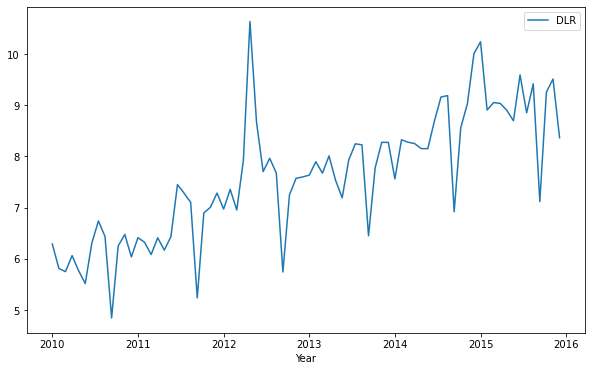

In [7]:
labels = [y for y in range(2010,2017)]

plt.figure(figsize=FIGSIZE)

plt.xlabel(YEAR_XLABEL)
plt.xticks(np.arange(0,79, step=13),labels)

plt.plot(journey_types['DLR'].values, label="DLR")

plt.legend()

plt.show()

# Comparing multiplier in journey numbers

In [8]:
increase_journey_types = pd.DataFrame(columns=types) 

baseline_row = {}
for i,row in journey_types.iterrows():
    if i == 0: #first row is the baseline 
        baseline_row = row 
    
    inc_row = {}
    for type in types: 
        if np.isnan(baseline_row[type]) and not np.isnan(row[type]):
            baseline_row[type] = row[type]
        inc =  (row[type] / baseline_row[type]) 
        inc_row[type] = inc
   
    increase_journey_types.loc[i] = inc_row
    
    
increase_journey_types

,Bus,Underground,DLR,Tram,Overground
0,1.000000,1.000000,1.000000,1.000000,NaN
1,0.960289,0.933427,0.924018,0.941868,NaN
2,0.930035,0.930870,0.914322,0.930648,NaN
3,0.969930,0.955097,0.963993,0.936251,NaN
4,0.848283,0.915511,0.916806,0.877916,NaN
...,...,...,...,...,...
73,0.986783,1.259347,1.497057,0.985097,2.795804
74,0.777856,0.942746,1.131629,0.808153,2.007897
75,0.949174,1.179931,1.471432,0.932519,2.731677
76,0.930549,1.206593,1.512177,0.975183,2.573196


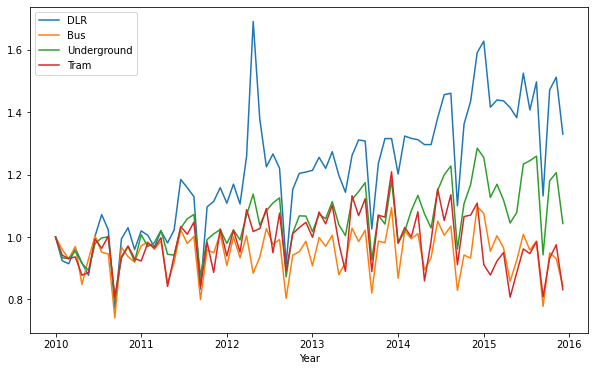

In [9]:
labels = [y for y in range(2010,2017)]

plt.figure(figsize=FIGSIZE)

plt.xlabel(YEAR_XLABEL)
plt.xticks(np.arange(0,79, step=13),labels)


plt.plot(increase_journey_types['DLR'].values, label="DLR")
plt.plot(increase_journey_types['Bus'].values, label="Bus")
plt.plot(increase_journey_types['Underground'].values, label="Underground")
plt.plot(increase_journey_types['Tram'].values, label="Tram")
#plt.plot(increase_journey_types['Overground'].values, label="Overground")

plt.legend()

plt.show()

**Observations:**
1. DLR has grown in popularity a lot more than the other 3 (bus, underground, tram).
2. There is a spike in DLR in 2012
3. DLR connects the East London to the centre (mostly in the east).